In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.signal import find_peaks
from IPython.display import display, clear_output

# Calculus Exercise
## Numerical Computation. Derivatives, integrals. Calculus in many dimensions

### Problem 1. Derivative and Slope at a Point
We'll warm up by visualizing how the derivative of a function relates to the slope of the function at a given point.

We can either calculate the derivative analytically (by hand) or use the numerical definition. So, let's see what a function and its derivative look like.

Write a Python function which plots a math function and its derivative.

In [3]:
def calculate_derivative_at_point(function, point, precision = 1e-7):
    """
    Calculates a numerical approximation to the derivative of the specified function
    at the given point
    """
    delta_x = point + precision
    return (function(delta_x) - function(point)) / precision

def plot_derivative(function, derivative = None, min_x = -10, max_x = 10):
    """
    Plots the function and its derivative. 
    The `derivative` parameter is optional and can be provided as a separate function.
    If it's not provided, the derivative will be calculated automatically
    """
    vectorized_function = np.vectorize(function)
    
    x = np.linspace(min_x, max_x, 1000)
    y = vectorized_function(x)
    
    dy = []
    if derivative is None:
        dy = np.vectorize(calculate_derivative_at_point)(function, x)
    else:
        dy = np.vectorize(derivative)(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Function')
    plt.plot(x, dy, label='Derivative', linestyle='--')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Function and its Derivative')
    plt.grid(True)
    plt.show()

Let's now test with out favourite function: $y = x^2$ whose derivative is $y' = 2x$. If you've worked correctly, both of the following plots should be the same.

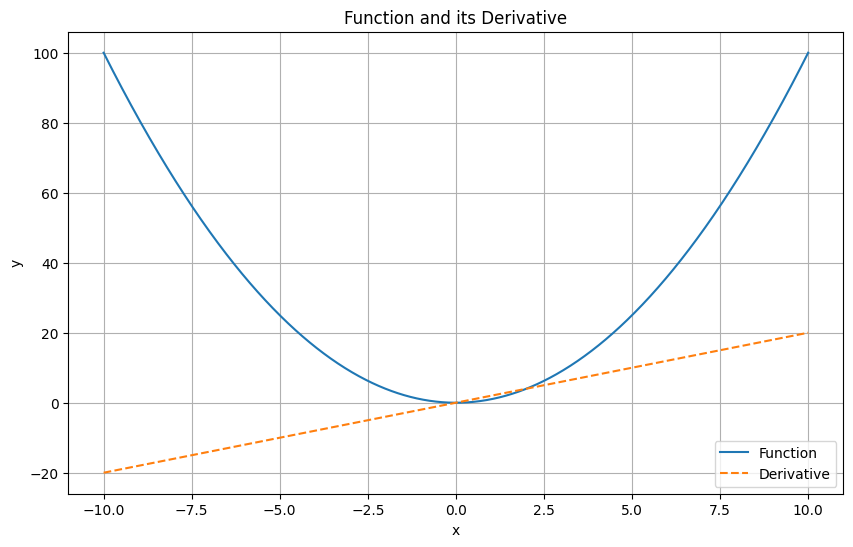

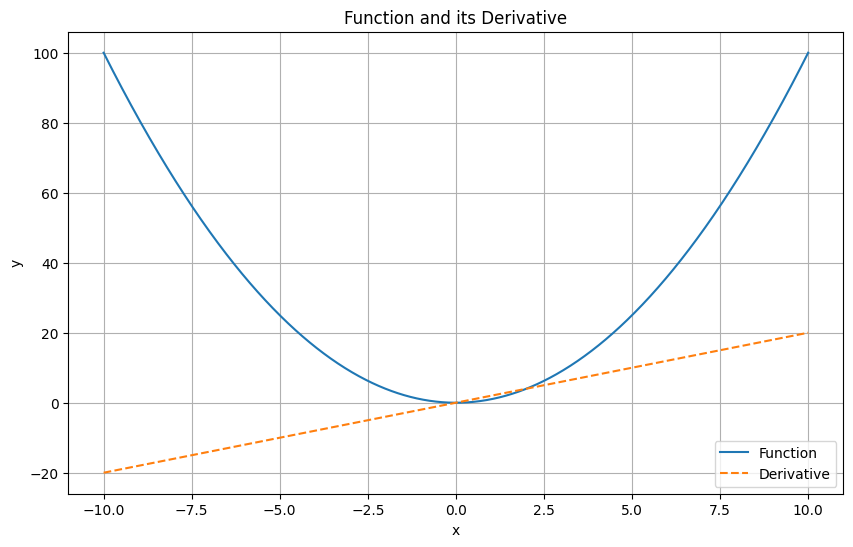

In [4]:
plot_derivative(lambda x: x ** 2, lambda x: 2 * x) # The derivative is calculated by hand
plot_derivative(lambda x: x ** 2) # The derivative is not pre-calculated, should be calculated inside the function

Let's try one more: $y = \sin(x)$, $y'= \cos(x)$.

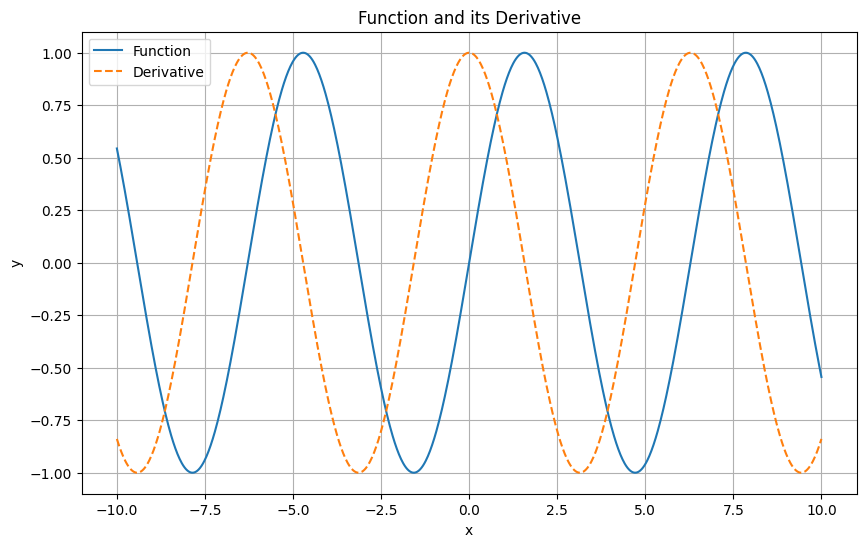

In [5]:
plot_derivative(np.sin)

These plots may look nice but they don't reflect the idea of **slope at a point** very well. Now that we're sure our functions are working, let's actually calculate the derivative at **one point** and see that it is, indeed, equal to the slope of the function at that point.

#### How to plot the tangent line?
We need to find the line equation first. 

We're given the derivative, which is equal to the slope of the line. In the line equation $y = ax + b$, the slope is $a$. We now have to find $b$. We're given a point $P(x_P; y_P)$ through which the line passes. Substitute $x_P$ and $y_P$:
$$ y_P = ax_P + b $$

$$ b = y_P - ax_P $$

Now that we have $a$ and $b$, we can plot the line given by $y = ax + b$. The parameter $b$ is sometimes called "y-intercept" (or "intercept").

Now we can copy the code from the previous function. This time, however, we won't plot the entire range, only one value of the derivative. We'll also show the point where we're calculating.

In [6]:
def plot_derivative_at_point(function, point, derivative = None, min_x = -10, max_x = 10):
    """
    Plots the function in the range [x_min; x_max]. Computes the tangent line to the function
    at the given point and also plots it
    """
    vectorized_function = np.vectorize(function)
    
    x = np.linspace(min_x, max_x, 1000)
    y = vectorized_function(x)
    
    slope = 0 # Slope of the tangent line
    if derivative is None:
        slope = calculate_derivative_at_point(function, point)
    else:
        slope = derivative(point)
    
    intercept = function(point) - slope * point
    tangent_line_x = np.linspace(point - 2, point + 2, 10)
    tangent_line_y = slope * tangent_line_x + intercept
    plt.plot(x, y)
    plt.plot(tangent_line_x, tangent_line_y)
    plt.show()

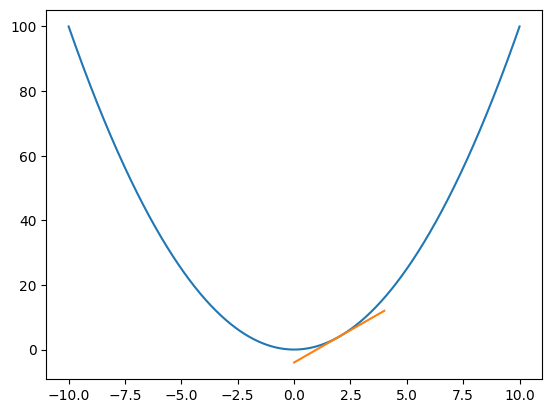

In [7]:
plot_derivative_at_point(lambda x: x ** 2, 2)

Looks like it! Let's zoom in to confirm:

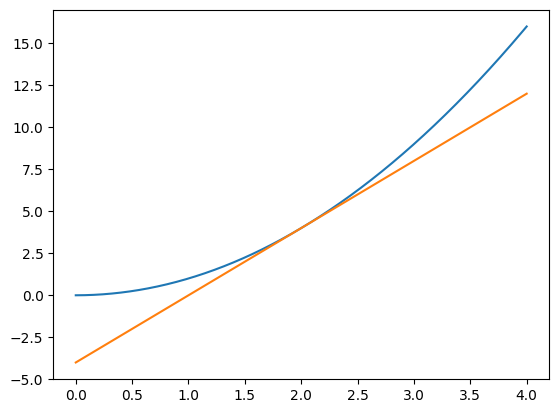

In [8]:
plot_derivative_at_point(lambda x: x ** 2, 2, min_x = 0, max_x = 4)

Let's also plot several tangents to the same function. Note that this will create many graphs by default. You can plot them all at once if you wish.

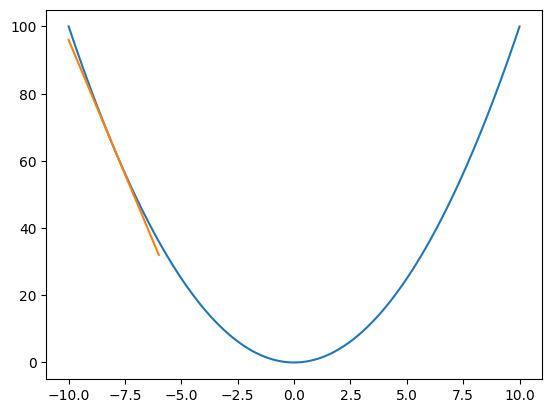

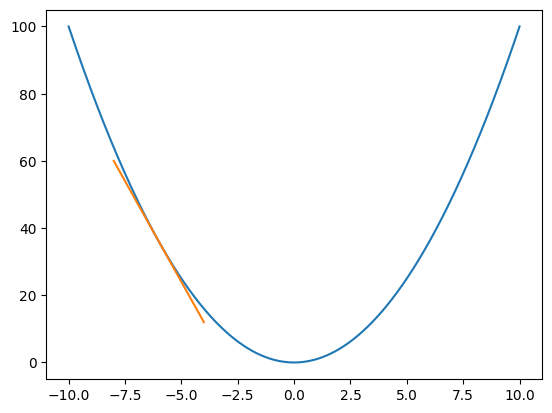

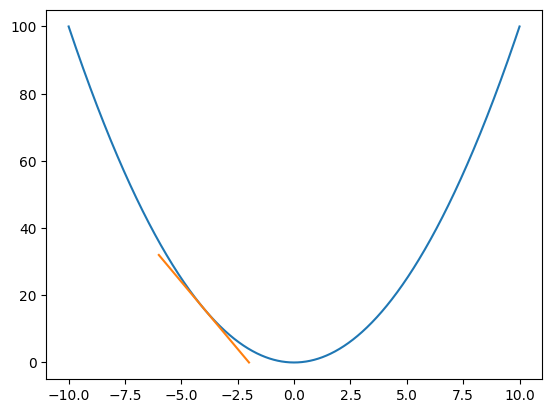

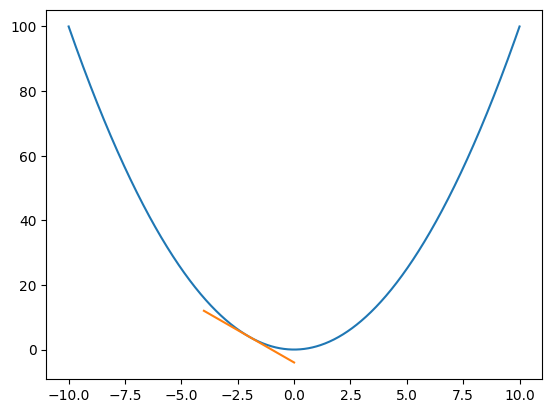

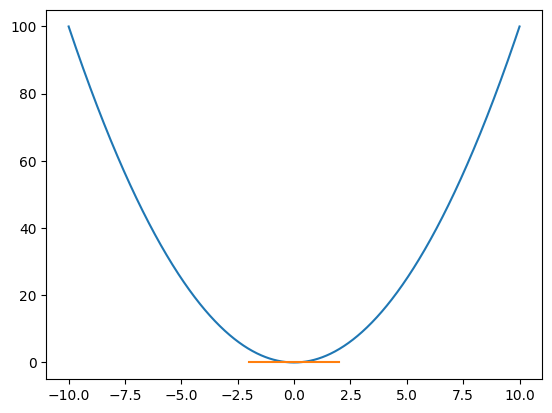

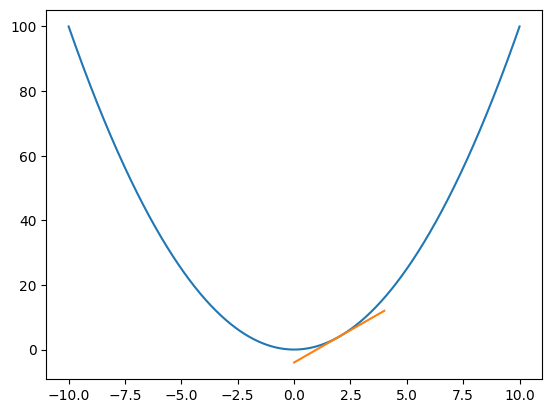

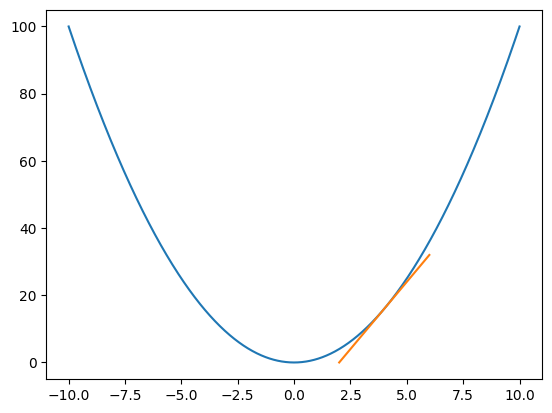

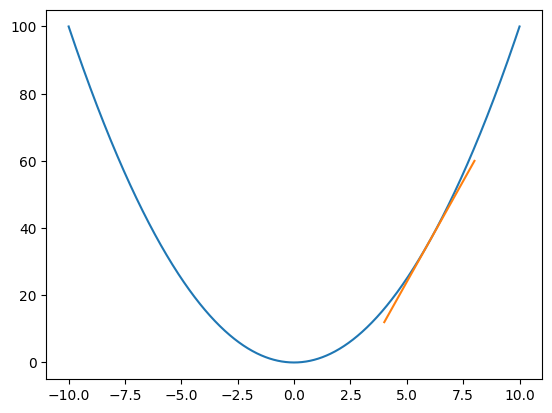

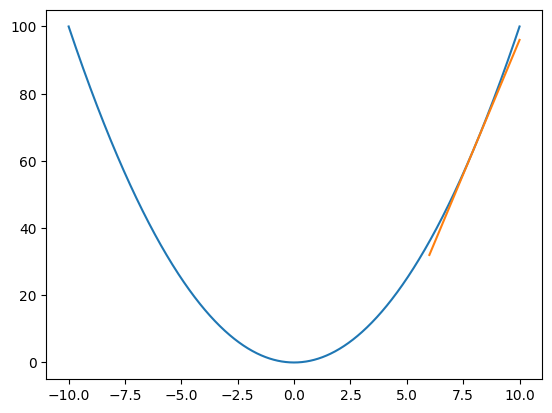

In [9]:
for x in np.arange(-8, 10, 2):
    plot_derivative_at_point(lambda x: x ** 2, x)

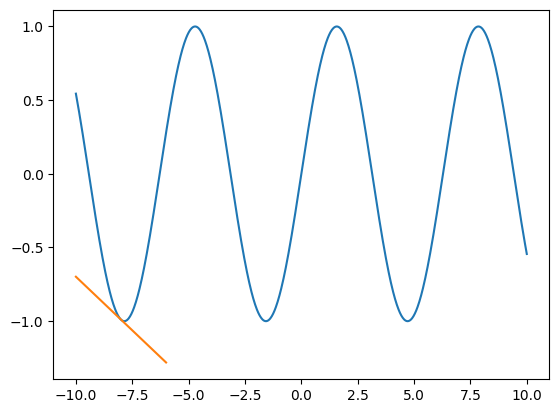

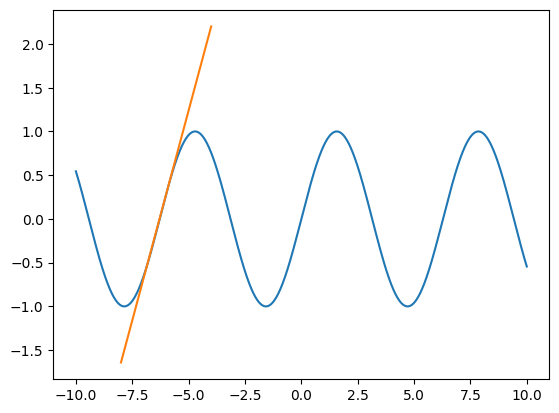

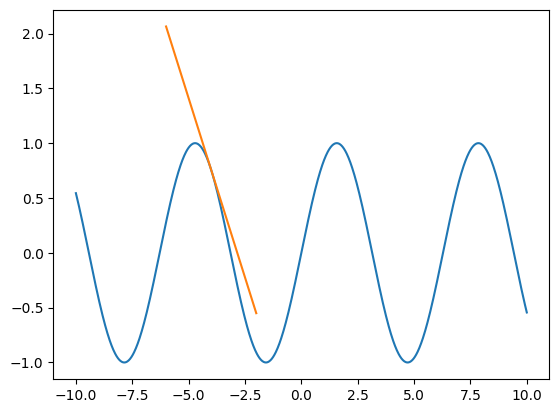

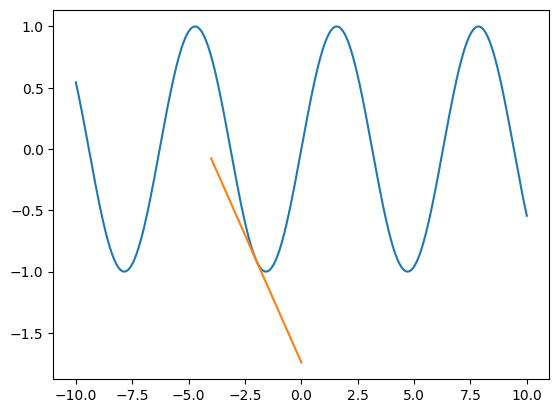

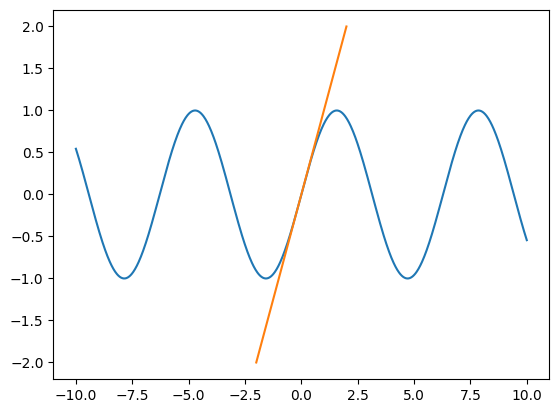

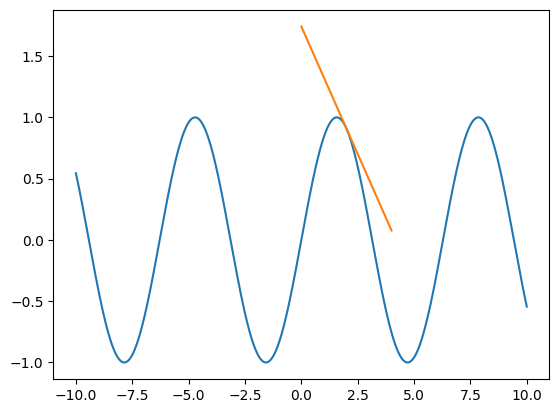

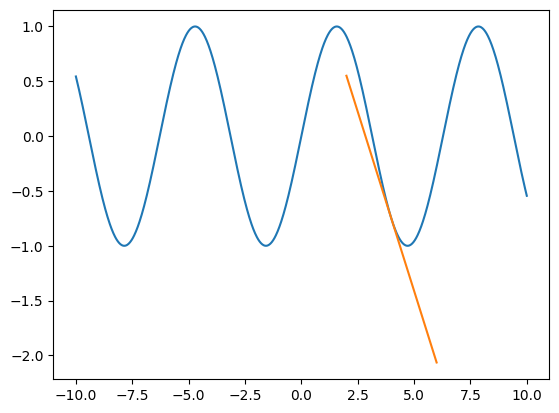

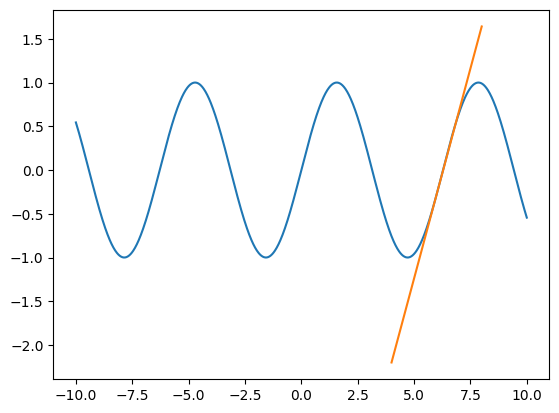

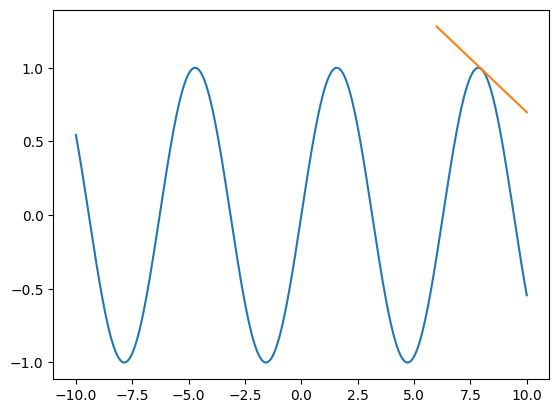

In [10]:
for x in np.arange(-8, 10, 2):
    plot_derivative_at_point(np.sin, x)

Now we have a visual proof that the derivative of a function at a given point is equal to the slope of the tangent line to the function.

### Problem 2. Limits. The Number $e$ as a Limit
We know what limits are, what they mean and how they relate to our tasks. Let's explore a special limit. This one arises from economics but we'll see it has applications throughout science because of its unique properties.

Imagine you're saving money in a bank. Every period, you accumulate [interest](https://en.wikipedia.org/wiki/Compound_interest) on your money. Let's say the bank is very generous and gives you **100% interest every year**.

How much money will you have after one year? Let's say you got $\$1$. After one year, you'll get your interest from the bank and you'll have $\$2$. Your money doubled, which was expected.

How about this offer: **50% interest every 6 months**? Will this be the same, better, or worse?
You start with $\$1$. After 6 months, you'll accumulate $50%$ interest to get $\$1,50$. After 6 more months, you'll get $50\%.1,50 = 0,75$, so your total is $2,25$. You got $\$0,25$ more!

Let's try to exploit the scheme and get rich.

**$100/12\%$ every month**
* January: $1 + 1/12$
* February: $(1 + 1/12) * (1 + 1/12)$
* March: $(1 + 1/12) * (1 + 1/12) * (1 + 1/12)$
* ...

We can see a pattern. Every period, we multiply our money by $1 + 1/12$. So, the final sum will be $$\$1.\left(1+\frac{1}{12}\right)^{12} = \$2,61$$

We did even better. This is always true. The more periods, the more money we accumulate. The more money we have, the more interest we accumulate. And that completes the vicious circle known as money saving :).

Let's try other options:

**$100/52\%$ every week**

$\$1.\left(1+\frac{1}{52}\right)^{52} = \$2,69$

**$100/31556926\%$ every second**

$\$1.\left(1+\frac{1}{31556926}\right)^{31556926} = \$2,718$

Well, there's a slight problem to our world domination plans. Even though we accumulate more and more money, we get *diminishing returns*. For 52 periods we got $2,69$, and for more than 3 million periods we only got like $\$0,02$ more. This pattern will continue.

Now we can ask ourselves, what is the maximum profit we can accumulate for a year? To do this, we can ask
$$ \lim_{n \ \rightarrow \infty}\left(1+\frac{1}{n}\right)^n = ? $$

It turns out this is a constant. It is approximately equal to $2,71828182\dots$. Since it's very useful, it's got a name: $e$, or Euler's number (sometimes called Napier's number). The limit above is **the definition of $e$**.

Why is it so useful? Let's go back to the original problem. In compound interest, the extra amount after every period is proportional to the amount at the start of the period. In other words, **the rate of change of a value is proportional to the value**. This pops out everywhere in nature and business. Some examples include radioactive decay (more atoms $\Rightarrow$ more decays), cooling down a cup of tea (the rate of cooling down depends on the temperature difference between the cup and the room), animal population models (more animals $\Rightarrow$ more babies), infection models, and so on.

To quickly verify the value of $e$, calculate the limit as we defined it above.

In [11]:
def calculate_limit_at_infinity(function):
    """
    Calculates a numerical approximation of the limit of the specified function
    as its parameter goes to infinity
    """
    n = 10 ** np.arange(0, 10)
    return zip(n, function(n))

In [12]:
limits = calculate_limit_at_infinity(lambda x: (1 + 1 / x) ** x)
for limit in limits:
    print(limit)

(np.int64(1), np.float64(2.0))
(np.int64(10), np.float64(2.5937424601000023))
(np.int64(100), np.float64(2.7048138294215285))
(np.int64(1000), np.float64(2.7169239322355936))
(np.int64(10000), np.float64(2.7181459268249255))
(np.int64(100000), np.float64(2.7182682371922975))
(np.int64(1000000), np.float64(2.7182804690957534))
(np.int64(10000000), np.float64(2.7182816941320818))
(np.int64(100000000), np.float64(2.7182817983473577))
(np.int64(1000000000), np.float64(2.7182820520115603))


### Problem 3. Derivatives of Exponential Functions
Use the function you defined in the first problem to plot the derivative of $y = 2^x$.

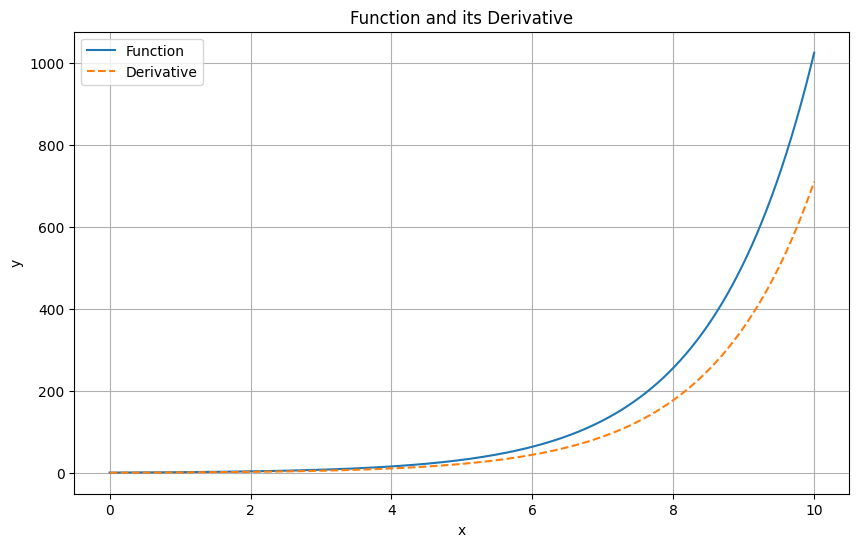

In [13]:
plot_derivative(lambda x: 2 ** x, min_x = 0, max_x = 10)

The function and its derivative look closely related, only the derivative seems to grow a bit slower than the function. Let's confirm that by looking at a broader range:

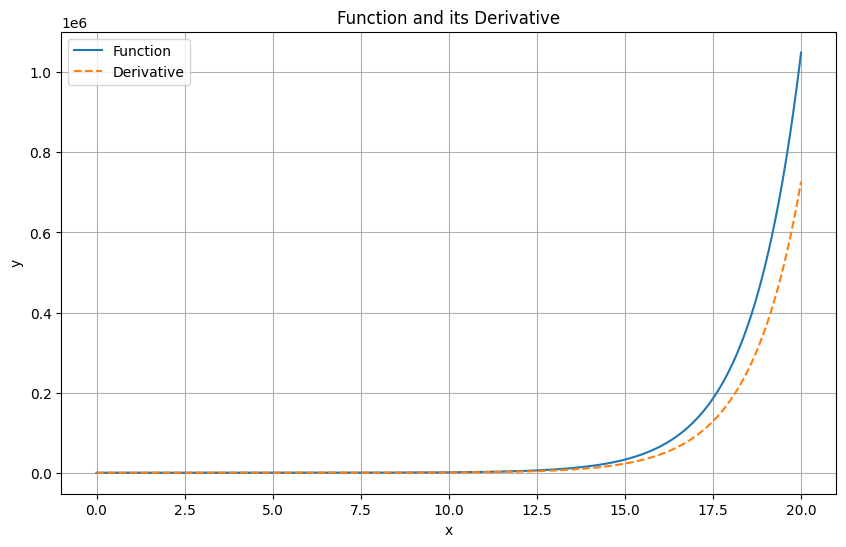

In [14]:
plot_derivative(lambda x: 2 ** x, min_x = 0, max_x = 20)

The same pattern will continue if we try to plot any exponential function, e.g. $y = 3^x$, $y = 4^x$ and so on, if the base of the exponent is greater than 1. If we want to plot, say, $y = 0,5^x$, we'll get a slightly different result. Note that the functions look more or less the same, only their signs are flipped.

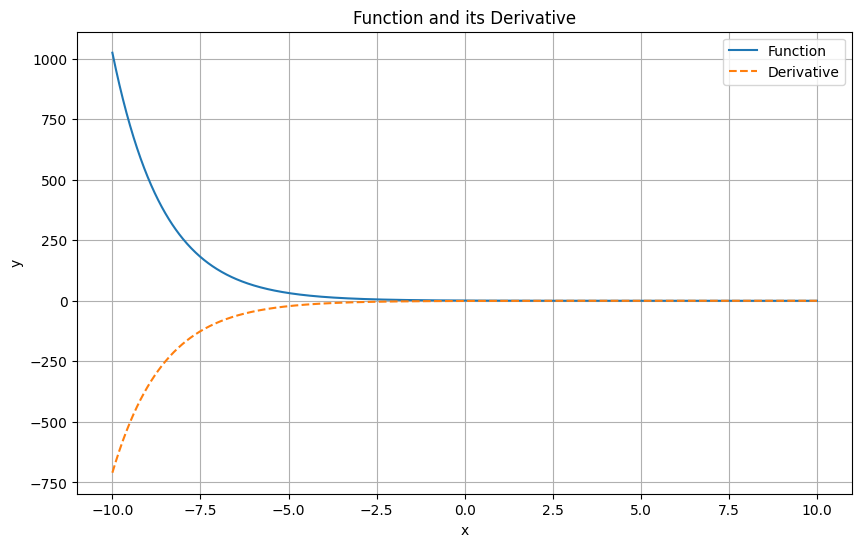

In [15]:
plot_derivative(lambda x: 0.5 ** x)

Very interesting things happen if we plot $y = e^x$:

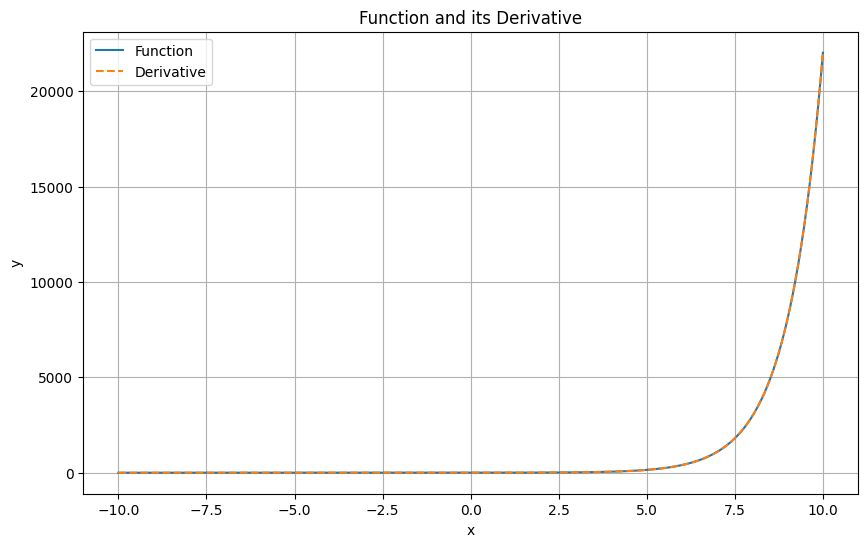

In [16]:
plot_derivative(np.exp)

The plots overlap. You can see that this is true if you plot the function and its derivative with different line widths. This means that

$$ (e^x)' = e^x $$

Also:
$$ (e^x)'' = e^x $$
$$ (e^x)''' = e^x $$
... and so on. This is the only function whose rate of change (derivative) is equal to the function itself. This property makes it even more interesting for science and math.

Also, do you remember that $e^{i\varphi} = \cos(\varphi) + i\sin(\varphi)$? This constant never ceases to amaze.

### Problem 4. Integrals and Area. Changing Variables in Integration
We know that the definition of an integral is the area "between" the function we're integrating, and the x-axis. This gives us a method to calculate integrals. Most integrals can't be solved analytically but have numerical solutions. One such integral is 
$$\int\sin(x^2)dx$$

Note that we can only solve **definite integrals** numerically.

The simplest way to calculate the integral is to apply the definition, like in the case of the derivative. This is called [the trapezoid method](http://www.mathwords.com/t/trapezoid_rule.htm) because the area is approximated as a series of trapezoids.

Write a function which does exactly that. Use `numpy` and vectorization as much as possible.

In [17]:
def calculate_integral(function, x_min, x_max, num_points = 5000):
    """
    Calculates a numerical approximation of the definite integral of the provided function
    between the points x_min and x_max.
    The parameter n specifies the number of points at which the integral will be calculated
    """
    x = np.linspace(x_min, x_max, num_points)
    y = function(x)

    delta_x = (x_max - x_min) / (num_points - 1)
    return delta_x / 2 * (np.sum(2 * y) - y[0] - y[-1])

In [18]:
print(calculate_integral(lambda x: x ** 2, 0, 1)) # Should be close to 0.333
print(calculate_integral(lambda x: np.sin(x ** 2), 0, 5)) # Should be close to 0.528

0.33333334000266746
0.5279181074995319


Let's apply our insight to finding the area of a circle. We know the equation of a circle is not a function (it's more like two functions). We can, however be clever. One way is to integrate both of the functions and add them together. Another way is to integrate one and double the area. 

**Note:** We're trying to find the total area of the circle, there is **no negative area** in this particular case.

Another, even more clever way is to look at a quarter of the circle. This is convenient because we may look at the quadrant where $x > 0$ and $y > 0$. So, we'll need to find the area between:
1. $x \ge 0$
2. $y \ge 0$
3. The circle $x^2 + y^2 \le R^2$ (let's fix the radius to be 1)

$\Rightarrow y = \sqrt{R^2 - x^2} = \sqrt{1 - x^2}$

After all of this, we'll need to multiply the result by 4.

$$ S = 4 \int_0^1\sqrt{1 - x^2}dx $$

In [19]:
circle_piece_area = calculate_integral(lambda x: np.sqrt(1 - x ** 2), 0, 1)
total_area = 4 * circle_piece_area
print(total_area)

3.1415893264324883


And we got a value close to $\pi$, which is the real answer.

#### * Optional: Integration in polar coordinates
We can, however, do better. We know that a circle looks much simpler in polar coordinates. Let's now change our viewpoint.

In polar coordinates $(r, \varphi)$, the equation of a circle is

$$ r = R $$

which is our case simplifies to $r = 1$. Note there's no dependence on $\theta$: the radius is the same regardless of the angle. The boundaries for $\theta$ are every possible angle from $0$ to $2\pi$ radians. For $r$, we have $r \ge 0$ and $r \le R$. This translates to the integral:

$$ S = \int_{\theta=0}^{2\pi}\int_{r=0}^R r dr d\theta $$

**Note:** We usually don't write the variables at the bottom of the integral symbol. I've done this just for clarity.

I won't go into details but since there's no dependence on $\theta$, we can simply "separate the integrals" and multiply 
them.

$$ S = \int_{0}^{2\pi}d\theta .\int_{r=0}^R r dr $$

The first one is:
$$ I_1 = \int_0^R r dr = \left.\frac{r^2}{2}\right|_{0}^{R} = \frac{R^2}{2} - \frac{0^2}{2} = \frac{R^2}{2} $$

And the second one is:
$$ I_2 = \int_0^{2\pi}1d\theta = \left.\theta\right|_0^{2\pi} = 2\pi - 0 = 2\pi $$

$$ \Rightarrow  S = I_1I_2 = 2\pi\frac{R^2}{2} = \pi R^2$$

$$ S = \pi R^2$$

### * Problem 5. Taylor Series. Computing Function Value Approximations
Some functions can be really hard to compute, or even impossible. However, there are ways to approximate functions with other functions, which are simpler. The idea is the same as what we already used: we approximated the function with its tangent line to find the derivative at a given point. Research what Taylor series are and how they're used in approximating functions. Derive and implement the Taylor expansions of several functions.
* What is "function approximation"?
* Why can't we compute all functions numerically?
* What are some easy ways to approximate a function near a given point?
* Polynomial functions are very useful approximators. Why? Think about their continuity and derivatives
* What information does the first derivative of a function give us?
    * How does that information generalize to higher-order derivatives (second, third, fourth, etc.)?
* What are Taylor series? Why does it work?
    * Derive the formula
    * What are Maclaurin series? What's the difference?
* Derive some Taylor series expansions. Some common functions are $\sin(x)$ and $\cos(x)$
    * To work with infinite sums, we have to "cut" them somewhere. Why are we allowed to do that? Think about the different terms: one Taylor expansion term doesn't affect the others
    * How are those expansions used in calculators / numerical libraries?
    * Write the code that computes the approximations
    * Test the code
* How many terms do we need?
    * Visualize how the approximation is getting better as we include more terms in the Taylor expansion
    

### Taylor Series, Maclauring Series, Approximation

#### Abstract

In this article, we explore the concept of Taylor series expansions and their use in approximating common mathematical functions, such as $ e^x $, $ sin⁡{x} $, and $ cos⁡{x} $. By using numerical methods, we derive and compute Taylor series approximations for each of these functions for a given value of $x$. The accuracy of these approximations is evaluated by comparing them to the actual values of the functions, and the impact of increasing the number of terms in the series was visualized.

#### 1. Function approximation

Function approximation is the process of finding a function that is close enough to another function, so that it can be used instead of the original one. This could be because the original function is too complex or unknown to be used. The goal is not to be perfect, but to be good enough for whatever task we are doing.

For example:

- Linear Regression

  -- Let's predict someone's weight based on their height. We could use a straightforward approach:
  $$ weight = a \times height + b $$

- Taylor Series

  -- Let's approximate $\sin{x}$ (centered at x = 0):

  $$ \sin{x} \approx x - \frac{x^3}{6} + \frac{x^5}{120} - \frac{x^7}{5040} + \cdots $$

- Neural Networks


  -- A deep neural network learns an approximate function from examples (to recognize objects in images, like "cat" and "dog"

- So much more...

We can't compute all functions numerically because many functions are either too complex, infinite, or impossible to describe exactly with a finite amount of operations.

For example, functions like $ \sin{x} $, $ e^x $, $ \ln{x} $ cannot be exactly written with a simple finite set of additions, multiplications, etc. To compute them, we use infinite series (like Taylor series) — but in practice, we can only use a finite number of terms, so we get an approximation, not the exact value.

#### 2. Approximate a function near a given point

Common ways to approximate a function near a point include:

A) Linear Approximation (Tangent Line)
It is a method used to approximate the value of a function near a given point using a linear function. This technique leverages the concept of the tangent line to the function at a specific point. The tangent line provides a simple linear function that closely approximates the original function near that point. Formula:

$$ f(x) \approx f(a) + f'(a)(x - a) $$

Let's use this example for the function $ \ln{x} $

In [20]:
def linear_approximation(f, f_prime, a, x):
    return f(a) + f_prime(a) * (x - a)

def f(x):
    return math.log(x)

def f_prime(x):
    return 1 / x

In [21]:
a = 1
x = 1.05

approximation = linear_approximation(f, f_prime, a, x)
actual = f(x)

print(f"Approximation of ln({x}): {approximation}")
print(f"Actual value of ln({x}): {actual}")

Approximation of ln(1.05): 0.050000000000000044
Actual value of ln(1.05): 0.04879016416943204


B) Use the First Term(s) of a Taylor Series

Use a few terms of the Taylor expansion to approximate.

For example:

$$ e^x \approx 1 + x \quad \text{(when } x \text{ is small)} $$

Example: Approximate $ e^{0.02} $

$ e^{0.02} \approx 1 + 0.02 = 1.02 $

The actual value is approximately 1.0202 — again, close!

In [22]:
def f(x):
    return math.exp(x)

def taylor_series_approximation(x):
    return 1 + x

In [23]:
x = 0.02
approximation = taylor_series_approximation(x)
actual = f(x)

print(f"Taylor series approximation of e^{x}: {approximation}")
print(f"Actual value of e^{x}: {actual}")

Taylor series approximation of e^0.02: 1.02
Actual value of e^0.02: 1.0202013400267558


#### 3. Polynomial functions

Polynomials are continuous everywhere. This means they don’t have breaks, jumps, or undefined points. For any value of $x$, a polynomial function will always give you a valid output. Continuity is crucial for approximation because we want the approximating function to behave smoothly and predictably near the point of interest. If a function has discontinuities, it can lead to erratic behavior when approximating. Polynomials have derivatives of all orders. This means you can compute the first, second, third, etc., derivatives at any point. This is significant because polynomials give us control over their rate of change at any point, which makes them perfect candidates for approximation. The first derivative of a polynomial tells you the slope at a point. The second derivative tells you how the slope is changing, and so on. The third and higher derivatives give insights into how the concavity is changing (jerk, rate of change of acceleration, etc.) and are used for more advanced applications. If you want to approximate a function near a point, the derivatives of the polynomial can be used to match the behavior of the function at that point (through Taylor series or other techniques). By matching the value of the function and its derivatives, we can create an approximation that behaves similarly to the original function. A Taylor series is essentially an infinite sum of polynomial terms, and it represents a function as a polynomial expansion about a point. Since polynomials are so flexible (they can approximate a function’s value, slope, curvature, etc.), the Taylor series lets us match the function’s behavior locally by using just a polynomial.

Let's see an example with the sine function:

In [24]:
def sin_approximation(x):
    return x - (x**3 / math.factorial(3)) + (x**5 / math.factorial(5))

def f(x):
    return math.sin(x)

In [25]:
x = 0.1
approximation = sin_approximation(x)
actual = f(x)

print(f"Approximation of sin({x}): {approximation}")
print(f"Actual value of sin({x}): {actual}")

Approximation of sin(0.1): 0.09983341666666667
Actual value of sin(0.1): 0.09983341664682815


#### 4. Taylor Series and Meclaurin Series

1) Taylor Series

The Taylor series is a way to represent a function as an infinite sum of terms that are calculated from the values of the function's derivatives at a single point. The basic idea is to approximate a function near a particular point using polynomials. The Taylor series works because any smooth and differentiable function can be approximated locally by a polynomial. By using the value of the function and the values of its derivatives at a specific point, we can create a polynomial that mimics the behavior of the function near that point. The more terms you include in the series, the better the approximation becomes (especially near the expansion point). This works particularly well if the function is smooth and has continuous derivatives.

Let f(x) be a function that is infinitely differentiable at a point aa. The Taylor series of f(x) around a is given by:

$$ f(x) = f(a) + f'(a)(x - a) + \frac{f''(a)}{2!} (x - a)^2 + \frac{f^{(3)}(a)}{3!} (x - a)^3 + \dots $$ 

=

$$ f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x - a)^n $$

As you include more terms in the series, the approximation gets better. The Taylor series converges to the function as long as the function is sufficiently smooth.

2) Maclaurin Series

The Maclaurin series is simply a special case of the Taylor series where the expansion point a=0. In other words, it's the Taylor series centered at zero. The Maclaurin series of a function f(x) is:

$$ f(x) = f(0) + f'(0)x + \frac{f''(0)}{2!} x^2 + \frac{f^{(3)}(0)}{3!} x^3 + \dots $$

=

$$ f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!} x^n $$

The difference is in the key fact that Taylor Series is the general formula for approximating a function around any point $a$, using the derivatives of the function at $a$, whereas Maclaurin Series is the special case of the Taylor series when the expansion point is at $a = 0$.

For example:

Taylor series for $ e^x $ around $ a = 1 $:
1) All derivatives of $ e^x $ are just $ e^x $
2) The Taylor series of a function around $a=1$ is:

$$ f(x) = f(1) + f'(1)(x - 1) + \frac{f''(1)}{2!} (x - 1)^2 + \frac{f^{(3)}(1)}{3!} (x - 1)^3 + \dots $$

= 

$$ e^x = e + e(x - 1) + \frac{e}{2!} (x - 1)^2 + \frac{e}{3!} (x - 1)^3 + \dots $$

In [26]:
def taylor_series_exp(x, a=1, terms=5):
    result = 0
    for n in range(terms):
        result += math.exp(a) * (x - a) ** n / math.factorial(n)
    return result

In [27]:
x = 2
approx = taylor_series_exp(x, a=1, terms=5)
exact = math.exp(x)

print(f"Taylor Series Approximation for e^2 (around x=1): {approx}")
print(f"Exact value of e^2: {exact}")

Taylor Series Approximation for e^2 (around x=1): 7.362013285409914
Exact value of e^2: 7.38905609893065


Maclaurin Series for $\sin{x}$:

$$ f(x) = f(0) + f'(0)x + \frac{f''(0)}{2!} x^2 + \frac{f^{(3)}(0)}{3!} x^3 + \dots $$ 

=

$$ \sin(x) = x - \frac{1x^3}{3!} + \frac{1x^5}{5!} - \frac{1x^7}{7!} + \dots $$

In [28]:
def maclaurin_series_sin(x, terms=5):
    result = 0
    for n in range(terms):
        result += ((-1) ** n) * (x ** (2 * n + 1)) / math.factorial(2 * n + 1)
    return result

In [29]:
x = 1
approx = maclaurin_series_sin(x, terms=5)
exact = math.sin(x)

print(f"Maclaurin Series Approximation for sin(1): {approx}")
print(f"Exact value of sin(1): {exact}")

Maclaurin Series Approximation for sin(1): 0.8414710097001764
Exact value of sin(1): 0.8414709848078965


#### 5. "Cut" the series

A Taylor series is an infinite sum of terms, and the question of "cutting" or truncating the series depends on the convergence of the series at a particular point. If the series converges to the function at that point, truncating the series at a finite number of terms will give a good approximation of the function. The reason why truncating the series doesn’t create major issues is that each term in the Taylor series is independent of the others. This means that each term represents an incremental change in the approximation of the function. If the Taylor series converges well, higher-order terms contribute less and less to the sum as you move further out in the expansion. In calculators and numerical libraries, Taylor series expansions (or similar series expansions) are often used to approximate functions because they provide a computationally efficient way to evaluate functions that may otherwise be difficult or slow to compute. These expansions are particularly useful for functions like trigonometric, exponential, and logarithmic functions, which are common in many scientific, engineering, and financial calculations.

#### 6. Code examples and tests

In [30]:
def exp_taylor(x, n_terms=10):
    result = 1.0 
    term = 1.0 
    for n in range(1, n_terms):
        term *= x / n
        result += term
    return result

def sin_taylor(x, n_terms=10):
    result = 0.0
    term = x 
    for n in range(1, n_terms):
        result += term
        term *= -x**2 / ((2 * n) * (2 * n + 1))  
    return result

def cos_taylor(x, n_terms=10):
    result = 1.0
    term = 1.0  
    for n in range(1, n_terms):
        term *= -x**2 / ((2 * n - 1) * (2 * n)) 
        result += term
    return result

In [31]:
x = 1.0 

n_terms = 10

exp_approx = exp_taylor(x, n_terms)
sin_approx = sin_taylor(x, n_terms)
cos_approx = cos_taylor(x, n_terms)

exp_actual = math.exp(x)
sin_actual = math.sin(x)
cos_actual = math.cos(x)

print(f"Using Taylor Series Approximation (n_terms={n_terms}):")
print(f"exp({x}) = {exp_approx} (Actual: {exp_actual})")
print(f"sin({x}) = {sin_approx} (Actual: {sin_actual})")
print(f"cos({x}) = {cos_approx} (Actual: {cos_actual})")

Using Taylor Series Approximation (n_terms=10):
exp(1.0) = 2.7182815255731922 (Actual: 2.718281828459045)
sin(1.0) = 0.8414709848078965 (Actual: 0.8414709848078965)
cos(1.0) = 0.5403023058681397 (Actual: 0.5403023058681398)


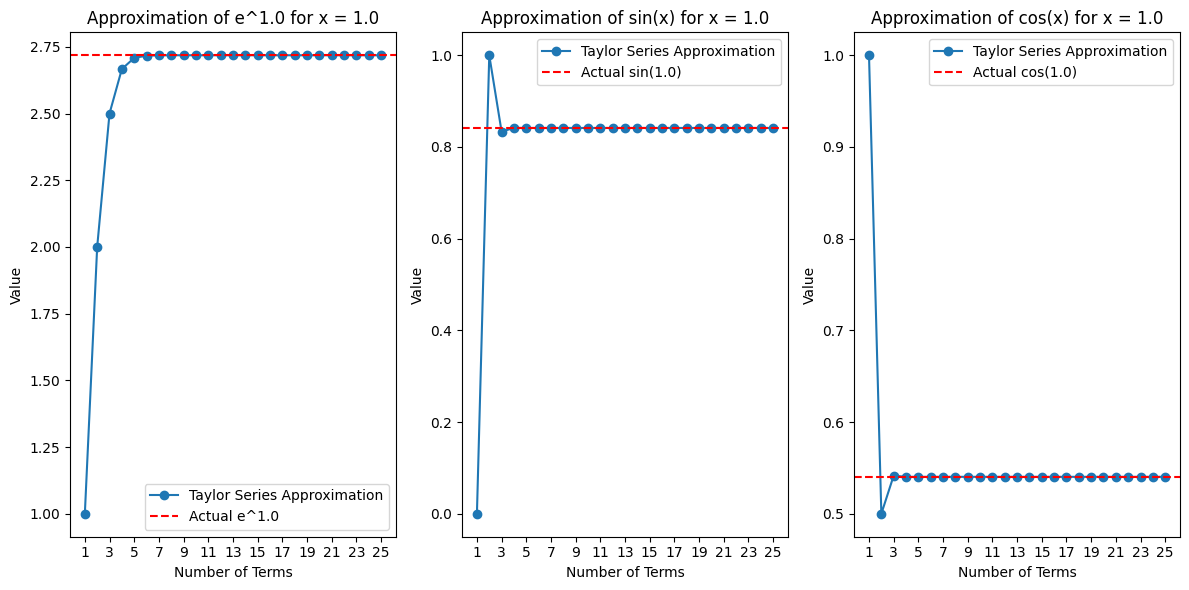

In [32]:
x = 1.0  
max_terms = 25
terms_range = np.arange(1, max_terms + 1)

exp_actual = math.exp(x)
sin_actual = math.sin(x)
cos_actual = math.cos(x)

exp_approximations = [exp_taylor(x, n_terms=n) for n in terms_range]
sin_approximations = [sin_taylor(x, n_terms=n) for n in terms_range]
cos_approximations = [cos_taylor(x, n_terms=n) for n in terms_range]

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(terms_range, exp_approximations, label="Taylor Series Approximation", marker='o')
plt.axhline(y=exp_actual, color='r', linestyle='--', label=f'Actual e^{x}')
plt.title(f'Approximation of e^{x} for x = {x}')
plt.xlabel('Number of Terms')
plt.ylabel('Value')
plt.xticks(np.arange(1, max_terms + 1, 2)) 
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(terms_range, sin_approximations, label="Taylor Series Approximation", marker='o')
plt.axhline(y=sin_actual, color='r', linestyle='--', label=f'Actual sin({x})')
plt.title(f'Approximation of sin(x) for x = {x}')
plt.xlabel('Number of Terms')
plt.ylabel('Value')
plt.xticks(np.arange(1, max_terms + 1, 2))
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(terms_range, cos_approximations, label="Taylor Series Approximation", marker='o')
plt.axhline(y=cos_actual, color='r', linestyle='--', label=f'Actual cos({x})')
plt.title(f'Approximation of cos(x) for x = {x}')
plt.xlabel('Number of Terms')
plt.ylabel('Value')
plt.xticks(np.arange(1, max_terms + 1, 2))
plt.legend()

plt.tight_layout()
plt.show()

#### 7. Conclusion

In conclusion, the Taylor series expansions for $ e^x $, $ sin⁡{x} $, and $ cos⁡{x} $ provide an efficient and accurate means of approximating these functions near a specified point, especially when only a limited number of terms are available. As more terms are added to the series, the approximations become increasingly accurate. This method is widely used in numerical libraries and calculators to evaluate complex functions. However, the convergence speed and accuracy depend on the function being approximated and the proximity to the expansion point, showing the importance of choosing an appropriate number of terms for each specific case.

### ** 6. Calculus in Medical Data. Electrocardiography (EKG)
EKG data is basically a 1-dimensional function of time. It records electrical impulses which depend on the state of the heart. How can we analyze EKG data?
* What is EKG data? What is the physical process and what is its interpretation?
    * Provide several EKG plots
    * What are the main parts of an EKG?
* How does the concept of local extrema relate to EKG?
* How does the concept of "convex" / "concave" graphs relate to EKG?

You can take various paths witk EKG data. Some companies, Samsung for example, use a heart rate sensor to measure stress and blood oxygen levels. An algorithm takes data for several seconds or minutes and analyzes it in several ways.
* Optional: Research how you can use EKG or pulse sensor data to measure oxygen in the blood. Have a look [here](https://www.quora.com/How-do-optical-heart-rate-sensors-work) for example
* Optional: How can you use the pulse sensor data to measure stress levels? There are many approaches to this one.
* Optional: Many diseases can be diagnosed from EKG data. Can you train an algorithm to recognize a certain disease? This is related to *time series* analysis

### EKG and Calculus in Medicine

#### Abstract

Electrocardiography (EKG or ECG) captures the electrical activity of the heart over time, producing a 1-dimensional time series signal. This article explores the physical basis of EKG signals, key waveform components (such as the P wave, QRS complex, and T wave), and how they reflect the heart's physiological processes. We analyse features like local extrema, convexity, and concavity. The article also examines practical applications, including stress and oxygen saturation monitoring, and introduces time series and machine learning techniques for automated disease diagnosis.

#### 1. EKG

EKG is a recording of the electrical activity of the heart over time.
It is a 1-dimensional time series, where:
- The x-axis is time (usually seconds or milliseconds).
- The y-axis is voltage (millivolts, mV).

The data comes from electrodes placed on the skin that detect tiny electrical changes resulting from depolarization and repolarization of cardiac muscle cells during each heartbeat.

The heart is an electrically active organ:
- It contains pacemaker cells that generate electrical impulses automatically.
- These impulses travel through specialized pathways (like the AV node, bundle of His, Purkinje fibers), causing the heart muscle to contract and pump blood.

The basic electrical events are:
- Depolarization: Heart muscle cells become electrically excited (positive ions enter cells), causing contraction.
- Repolarization: Cells return to their resting state (recovery phase).

Each cardiac cycle (heartbeat) shows characteristic waves:
- P wave: Atrial depolarization (atria contract).
- PR interval: Time from atrial to ventricular depolarization (AV node delay).
- QRS complex: Ventricular depolarization (ventricles contract).
- ST segment: Time after ventricular contraction begins (should be flat).
- T wave: Ventricular repolarization (ventricles relax).
- QT interval: Total time for depolarization and repolarization of ventricles.

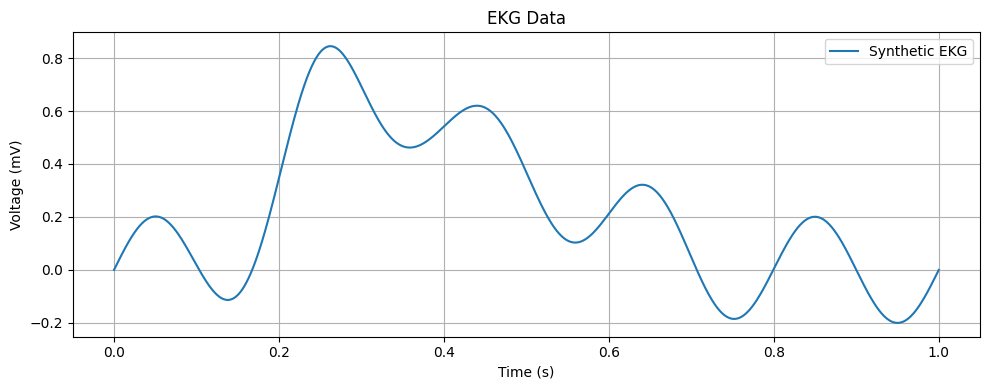

In [33]:
t = np.linspace(0, 1, 1000)

ekg_signal = (
    0.2 * np.sin(2 * np.pi * 5 * t) +             
    1.0 * np.exp(-100 * (t - 0.3)**2) +          
    -0.15 * np.exp(-300 * (t - 0.28)**2) +        
    -0.25 * np.exp(-300 * (t - 0.32)**2) +         
    0.35 * np.exp(-50 * (t - 0.5)**2)              
)

plt.figure(figsize=(10, 4))
plt.plot(t, ekg_signal, label="Synthetic EKG")
plt.title("EKG Data")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### 2. Physical process behind EKG

The heart is an electrically active organ that functions through:
- Pacemaker cells (mainly in the sinoatrial (SA) node) that spontaneously generate electrical impulses.
- These impulses travel through the heart's conduction system: AV node -> Bundle of His -> Bundle branches -> Purkinje fibers.
- Electrical signals cause depolarization (cells become positively charged and contract), followed by repolarization (cells return to rest).

This process allows the heart to contract rhythmically and pump blood effectively.

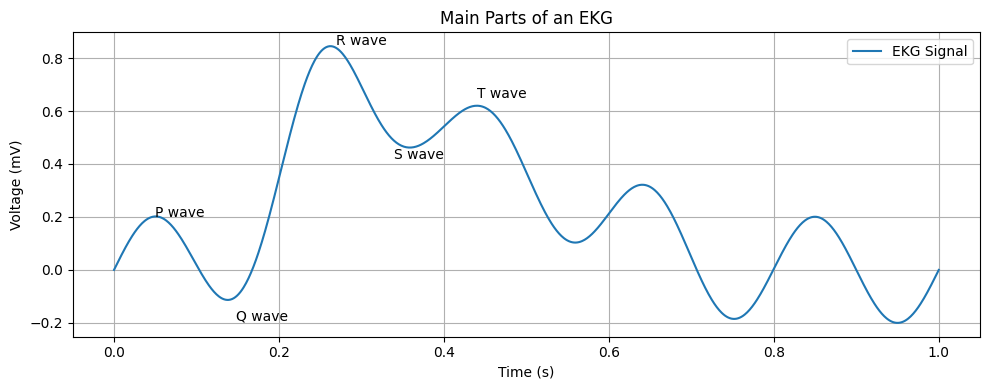

In [34]:
t = np.linspace(0, 1, 1000)
ekg_signal = (
    0.2 * np.sin(2 * np.pi * 5 * t) +
    1.0 * np.exp(-100 * (t - 0.3)**2) +
    -0.15 * np.exp(-300 * (t - 0.28)**2) +
    -0.25 * np.exp(-300 * (t - 0.32)**2) +
    0.35 * np.exp(-50 * (t - 0.5)**2)
)

# Annotate key parts
plt.figure(figsize=(10, 4))
plt.plot(t, ekg_signal, label="EKG Signal")

plt.text(0.08, 0.2, 'P wave', fontsize=10, ha='center')
plt.text(0.18, -0.19, 'Q wave', fontsize=10, ha='center')
plt.text(0.30, 0.85, 'R wave', fontsize=10, ha='center')
plt.text(0.37, 0.42, 'S wave', fontsize=10, ha='center')
plt.text(0.47, 0.65, 'T wave', fontsize=10, ha='center')

plt.title("Main Parts of an EKG")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### 3. EKG Plots

Different heart conditions produce distinctive waveforms. For example:
- Normal sinus rhythm: Regular P, QRS, and T waves.
- Tachycardia: Fast heart rate (short R-R intervals).
- Bradycardia: Slow heart rate (long R-R intervals).
- Arrhythmia: Irregular or missing waves.
- Myocardial infarction: ST segment elevation or depression.

In [35]:
def generate_ekg_beat(t, r_peak_time, heart_rate=60):
    """Create one synthetic EKG beat centered around r_peak_time"""
    return (
        0.2 * np.sin(2 * np.pi * 5 * (t - r_peak_time)) +
        1.0 * np.exp(-100 * (t - r_peak_time)**2) +             # R
        -0.15 * np.exp(-300 * (t - (r_peak_time - 0.02))**2) +  # Q
        -0.25 * np.exp(-300 * (t - (r_peak_time + 0.02))**2) +  # S
        0.35 * np.exp(-50 * (t - (r_peak_time + 0.15))**2)      # T
    )

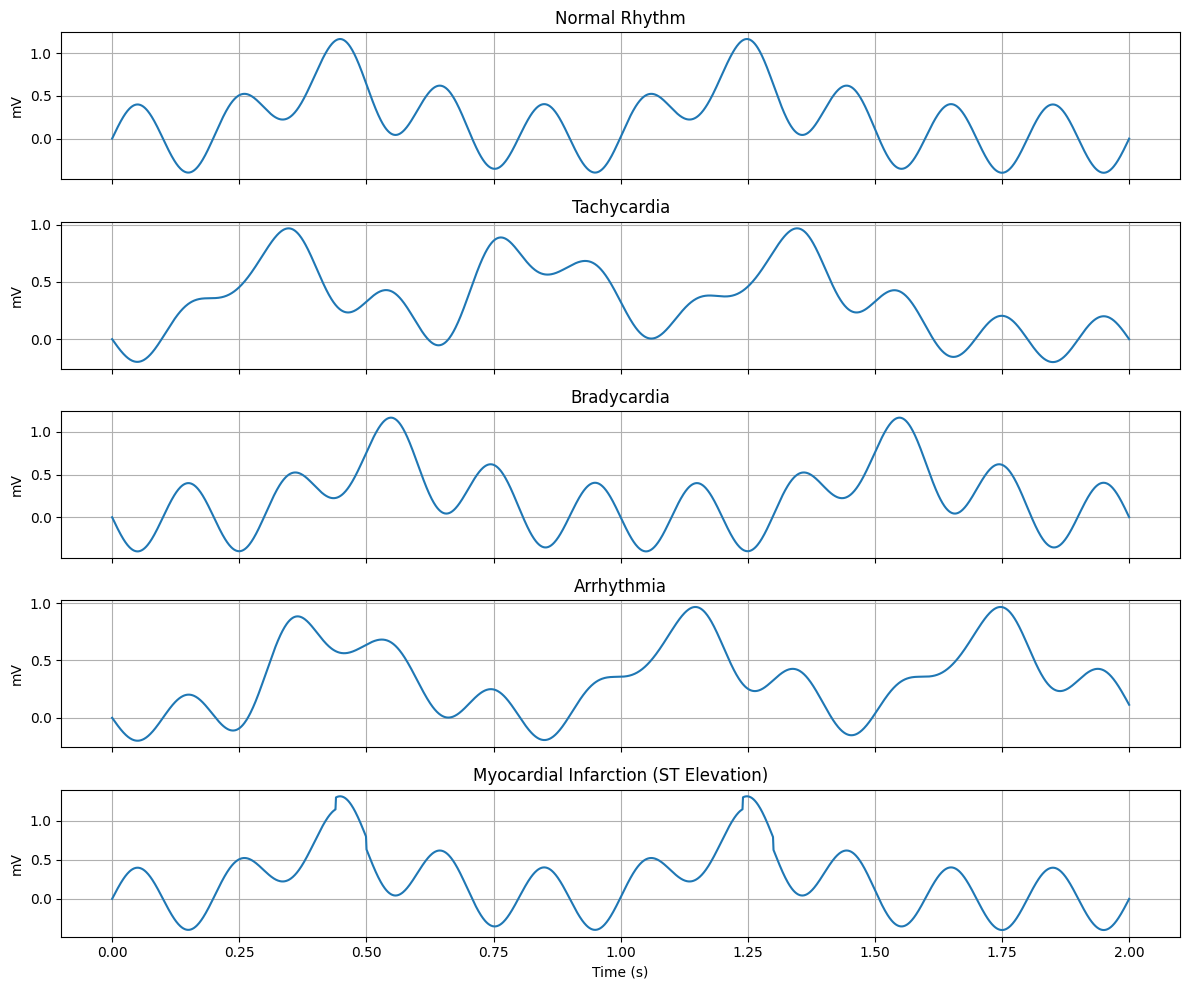

In [36]:
t = np.linspace(0, 2, 2000)

conditions = {
    "Normal Rhythm": [0.4, 1.2],
    "Tachycardia": [0.3, 0.8, 1.3],
    "Bradycardia": [0.5, 1.5],
    "Arrhythmia": [0.4, 1.1, 1.7], 
    "Myocardial Infarction (ST Elevation)": [0.4, 1.2]
}

fig, axes = plt.subplots(len(conditions), 1, figsize=(12, 10), sharex=True)

for ax, (label, r_peaks) in zip(axes, conditions.items()):
    signal = np.zeros_like(t)
    for r_peak in r_peaks:
        beat = generate_ekg_beat(t, r_peak)
        if label == "Myocardial Infarction (ST Elevation)":
            beat += 0.15 * ((t > r_peak + 0.04) & (t < r_peak + 0.1))  # ST elevation
        signal += beat
    ax.plot(t, signal)
    ax.set_title(label)
    ax.set_ylabel("mV")
    ax.grid(True)

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

#### 4. Local Extrema in EKG

EKG waveforms have local maxima and minima which represent physiological events:
- Local maxima: R peaks in the QRS complex (used to measure heart rate).
- Local minima: Q and S waves.
- T and P waves: Also local extrema representing repolarization and atrial activity.

Detecting and analyzing extrema is essential for automated diagnosis and signal segmentation.

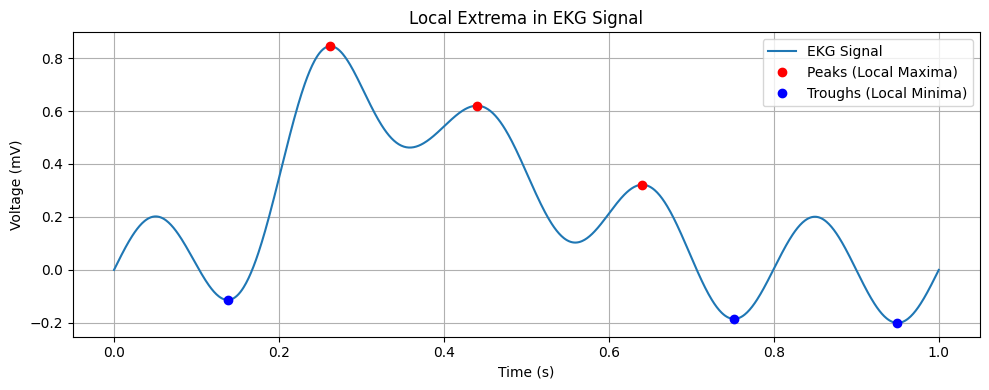

In [37]:
t = np.linspace(0, 1, 1000)
ekg_signal = (
    0.2 * np.sin(2 * np.pi * 5 * t) +
    1.0 * np.exp(-100 * (t - 0.3)**2) +
    -0.15 * np.exp(-300 * (t - 0.28)**2) +
    -0.25 * np.exp(-300 * (t - 0.32)**2) +
    0.35 * np.exp(-50 * (t - 0.5)**2)
)

peaks, _ = find_peaks(ekg_signal, height=0.3)

troughs, _ = find_peaks(-ekg_signal, height=0.1)

plt.figure(figsize=(10, 4))
plt.plot(t, ekg_signal, label='EKG Signal')
plt.plot(t[peaks], ekg_signal[peaks], 'ro', label='Peaks (Local Maxima)')
plt.plot(t[troughs], ekg_signal[troughs], 'bo', label='Troughs (Local Minima)')
plt.title("Local Extrema in EKG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 5. Convexity and Concavity in EKG

The shape of an EKG curve can be:
- Concave upward (e.g., some normal ST segments),
- Convex upward (e.g., ST elevation in myocardial infarction).

This graph shape analysis helps distinguish between benign and pathological patterns. Algorithms use curvature and second derivatives to detect abnormalities.

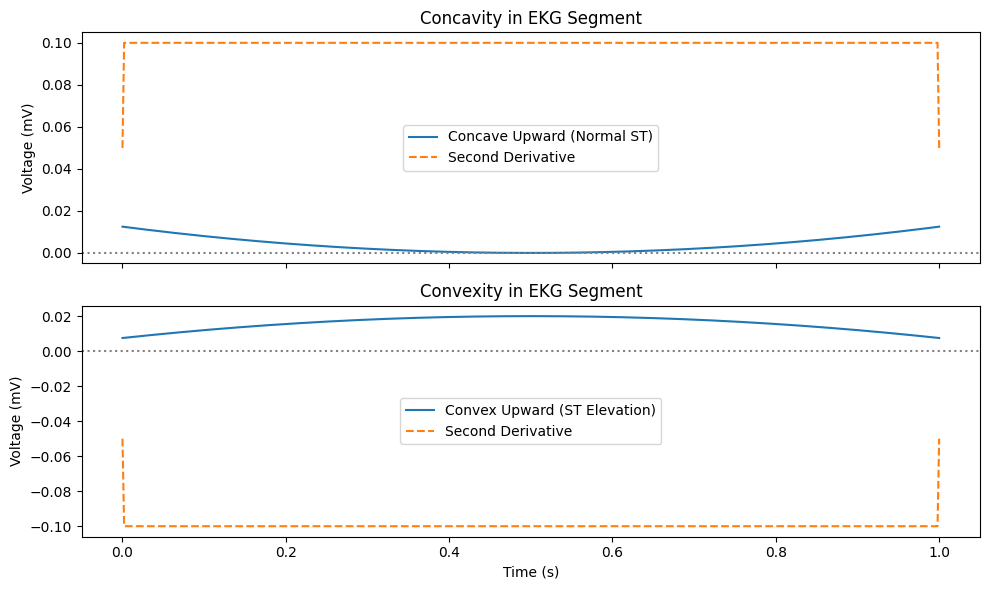

In [38]:
t = np.linspace(0, 1, 1000)
normal_st = 0.05 * (t - 0.5)**2 
st_elevation = -0.05 * (t - 0.5)**2 + 0.02 

d2_normal = np.gradient(np.gradient(normal_st, t), t)
d2_elevation = np.gradient(np.gradient(st_elevation, t), t)

fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

ax[0].plot(t, normal_st, label="Concave Upward (Normal ST)")
ax[0].plot(t, d2_normal, label="Second Derivative", linestyle='--')
ax[0].axhline(0, color='gray', linestyle=':')
ax[0].legend()
ax[0].set_ylabel("Voltage (mV)")
ax[0].set_title("Concavity in EKG Segment")

ax[1].plot(t, st_elevation, label="Convex Upward (ST Elevation)")
ax[1].plot(t, d2_elevation, label="Second Derivative", linestyle='--')
ax[1].axhline(0, color='gray', linestyle=':')
ax[1].legend()
ax[1].set_ylabel("Voltage (mV)")
ax[1].set_xlabel("Time (s)")
ax[1].set_title("Convexity in EKG Segment")

plt.tight_layout()
plt.show()

#### 6. Applications in Health Monitoring

Blood Oxygen ($ SpO_2 $): Measured with pulse oximetry, not directly from EKG. However, pulse data (from photoplethysmography, PPG) is used to infer $ SpO_2 $ by analyzing light absorption related to oxygen levels in the blood.

Stress Detection: Heart rate variability (HRV), derived from EKG, is a key marker. Low HRV often indicates high stress or poor autonomic balance.

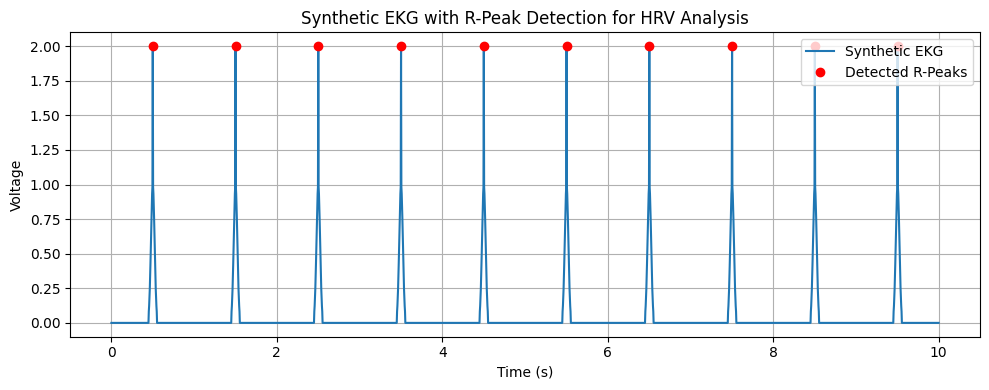

In [39]:
fs = 250  
duration = 10 
t = np.linspace(0, duration, duration * fs)

ekg = np.zeros_like(t)
for beat in range(duration):
    idx = int((beat + 0.5) * fs)
    ekg[idx] = 1.0  
    
    spread = np.exp(-np.linspace(-0.5, 0.5, fs//10)**2 * 10)
    start = idx - len(spread) // 2
    ekg[start:start+len(spread)] += spread

peaks, _ = find_peaks(ekg, height=0.8)
RR_intervals = np.diff(t[peaks])
sdnn = np.std(RR_intervals)

plt.figure(figsize=(10, 4))
plt.plot(t, ekg, label="Synthetic EKG")
plt.plot(t[peaks], ekg[peaks], "ro", label="Detected R-Peaks")
plt.xlabel("Time (s)")
plt.ylabel("Voltage")
plt.title("Synthetic EKG with R-Peak Detection for HRV Analysis")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

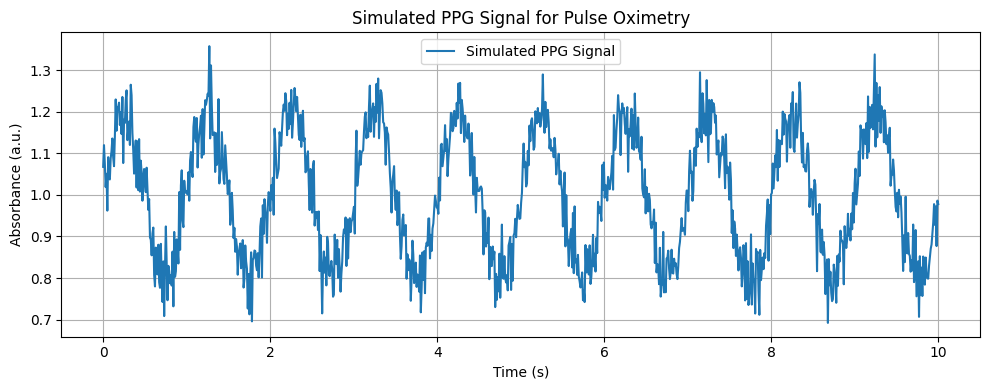

In [40]:
fs_ppg = 100  # Hz
duration_ppg = 10  # seconds
t_ppg = np.linspace(0, duration_ppg, duration_ppg * fs_ppg)

dc_level = 1.0
ac_amplitude = 0.2
heart_rate_freq = 1.0 

ppg_signal = dc_level + ac_amplitude * np.sin(2 * np.pi * heart_rate_freq * t_ppg) + 0.05 * np.random.randn(len(t_ppg))

plt.figure(figsize=(10, 4))
plt.plot(t_ppg, ppg_signal, label="Simulated PPG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Absorbance (a.u.)")
plt.title("Simulated PPG Signal for Pulse Oximetry")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ac_component = ppg_signal - np.mean(ppg_signal)
dc_component = np.mean(ppg_signal)
ratio = np.abs(ac_component).max() / dc_component

#### 7. Time Series Analysis and Machine Learning for Disease Detection

EKG is a classic example of time series data. Techniques like:
- Peak detection
- Fourier/wavelet analysis
- LSTM or CNN deep learning models

...are used to detect diseases like arrhythmias, atrial fibrillation, and heart attacks. Training on labeled datasets enables automated diagnosis with high accuracy.

#### 8. Conclusion

EKG data provides a powerful, non-invasive window into heart function. By interpreting waveform patterns and their geometric properties, clinicians can diagnose a range of conditions from normal sinus rhythm to arrhythmias and myocardial infarctions. Modern approaches enhance this analysis with computational tools: from basic signal processing to advanced machine learning models capable of recognizing complex abnormalities in large datasets. The integration of EKG data with wearable technologies and AI opens new doors in personalized health monitoring, stress detection, and real-time diagnostics.

### ** 7. Physics Engine
Use your knowledge of vectors, algebra and calculus to create a physics engine. You can use this for many things. One example is computer games. Another example is computer simulation.

Don't forget to provide details about your calculations and implementations. 
* Implement vectors and operations
* Implement visualization
* Implement Newtonian mechanics with forces as vectors acting on material points
* Implement another physical process: e.g. collision detection. This should take into account momentum and the law of conservation of momentum
    * You can also implement other physical phenomena (e.g. heat transfer, reflection of light, etc.), as you need.

In [41]:
class Vector2D:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Vector2D(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Vector2D(self.x - other.x, self.y - other.y)

    def __mul__(self, scalar):
        return Vector2D(self.x * scalar, self.y * scalar)

    def __truediv__(self, scalar):
        return Vector2D(self.x / scalar, self.y / scalar)

    def dot(self, other):
        return self.x * other.x + self.y * other.y

    def magnitude(self):
        return (self.x**2 + self.y**2)**0.5

    def normalize(self):
        mag = self.magnitude()
        return Vector2D(0, 0) if mag == 0 else self / mag

    def __repr__(self):
        return f"({self.x:.2f}, {self.y:.2f})"

In [42]:
class Particle:
    def __init__(self, mass, position, velocity, radius=0.5):
        self.mass = mass
        self.position = position
        self.velocity = velocity
        self.force_accumulator = Vector2D(0, 0)
        self.radius = radius

    def apply_force(self, force):
        self.force_accumulator += force

In [43]:
class PhysicsEngine:
    def __init__(self, particles, dt): 
        self.particles = particles
        self.dt = dt
        self.boundary = 9.5 
    
    def update(self):
        for p in self.particles:
            p.force_accumulator = Vector2D(0, 0)
            p.apply_force(Vector2D(0, -9.81 * p.mass))

        for p in self.particles:
            acceleration = p.force_accumulator / p.mass
            p.velocity += acceleration * self.dt
            p.position += p.velocity * self.dt

        self._resolve_collisions()
        self._handle_boundaries()

    def _handle_boundaries(self):
        for p in self.particles:
            if p.position.x < -self.boundary + p.radius:
                p.velocity.x *= -0.8
                p.position.x = -self.boundary + p.radius
            elif p.position.x > self.boundary - p.radius:
                p.velocity.x *= -0.8
                p.position.x = self.boundary - p.radius
                
            if p.position.y < -self.boundary + p.radius:
                p.velocity.y *= -0.8
                p.position.y = -self.boundary + p.radius
            elif p.position.y > self.boundary - p.radius:
                p.velocity.y *= -0.8
                p.position.y = self.boundary - p.radius
    
    def _resolve_collisions(self):
        for i in range(len(self.particles)):
            for j in range(i+1, len(self.particles)):
                p1 = self.particles[i]
                p2 = self.particles[j]
                
                delta = p2.position - p1.position
                distance = delta.magnitude()
                min_dist = p1.radius + p2.radius

                if distance < min_dist and distance > 0:
                    normal = delta / distance
                    
                    rel_velocity = p2.velocity - p1.velocity
                    v_rel = rel_velocity.dot(normal)
                    
                    if v_rel > 0: 
                        continue
                        
                    e = 0.8 
                    j = -(1 + e) * v_rel / (1/p1.mass + 1/p2.mass)
                    
                    impulse = normal * j
                    p1.velocity -= impulse / p1.mass
                    p2.velocity += impulse / p2.mass

                    overlap = (min_dist - distance)/2
                    p1.position -= normal * overlap
                    p2.position += normal * overlap

In [44]:
def visualize(particles, dt, duration):
    fig, ax = plt.subplots()
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal')
    
    circles = [plt.Circle((p.position.x, p.position.y), p.radius, fc='r') 
              for p in particles]
    for c in circles:
        ax.add_patch(c)
        
    engine = PhysicsEngine(particles, dt)
    
    for _ in range(int(duration/dt)):
        engine.update()
        for c, p in zip(circles, particles):
            c.center = (p.position.x, p.position.y)
        clear_output(wait=True)
        display(fig)
        plt.pause(0.001)
        
    plt.close()

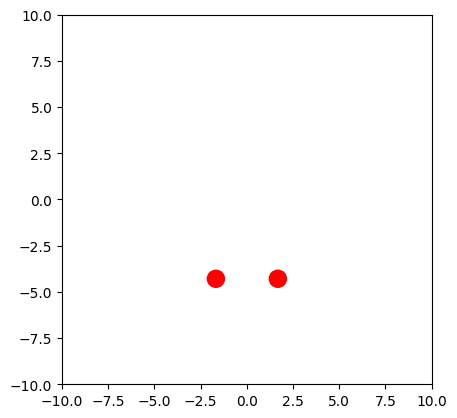

In [45]:
p1 = Particle(1.0, Vector2D(-3, 0), Vector2D(2, 0), radius=0.5)
p2 = Particle(1.0, Vector2D(3, 0), Vector2D(-2, 0), radius=0.5)
visualize([p1, p2], dt=0.0167, duration=2)